# Init & parsing


In [14]:
from collections import Counter
from application import *
from pre_processing import Job, Systems, Objects 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from journal import Journal, JournalASU, jobs_to_df
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [15]:
jobs = []
# jobs.extend(process_files(r'.\input data\1', all_visible_sheets, works_parser.ParserSake))
jobs.extend(process_files(r'.\input data\2', all_visible_sheets, works_parser.ParserSake)) # ASU
# jobs.extend(process_files(r'.\input data\АСУ', find_sheets_asu, works_parser.ParserAsu))
# jobs.extend(process_files(r'.\input data\ВОЛС', all_visible_sheets, works_parser.ParserVols))
# jobs.extend(process_files(r'.\input data\Телеканал', find_sheets_vols, works_parser.ParserTk))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskueSake))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskue))
# jobs.extend(process_files(r'.\input data\Тех.учет', find_sheets_vols, works_parser.ParserTechReg))
print(len(jobs))

folder: .\input data\2
247


In [16]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

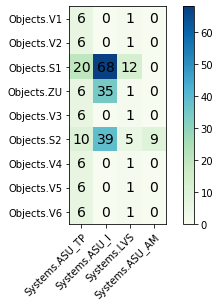

In [17]:
statistics.visualize_statistics(stats)

In [5]:
for (xlabel, ylabel), count in stats.items():
    print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

# Tests

ASU test

In [6]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

VOLS test

In [9]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

TK test

In [10]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

ASKUE test

In [11]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

TECH_REG test

In [12]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0

print('all TECH_REG tests is complete')

# Sandbox

In [18]:
import pandas as pd
from pre_processing import Systems, Objects

In [19]:
df_jobs = jobs_to_df(jobs)


In [20]:
from journal import Journal, JournalASU, jobs_to_df, batch_journal_generator
from config_journals import batch_ASU_journals

In [24]:
j1 = JournalASU(df_jobs)
j1.make_journal(Systems.ASU_I, Objects.S1 , 'Юг')
j1.journal
# j1.save_journal('test')

,date,place,work_type,tech_map,performer
72,2020-02-01,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Макаров
73,2020-02-02,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Ильин
74,2020-02-03,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Гусев
75,2020-02-04,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Харитонов
76,2020-02-05,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Харитонов
101,2020-02-05,С1 Юг,ТО1,Технологическая карта 02/ИС/С1Ю/2/2/2016,Харитонов
77,2020-02-06,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Харитонов
78,2020-02-07,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Харитонов
79,2020-02-08,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Подольский
80,2020-02-09,С1 Юг,ЕТО,Технологическая карта 01/ИС/С1Ю/2/2/2016,Макаров


In [25]:
batch_journal_generator(df_jobs, JournalASU, batch_ASU_journals)


TypeError: first argument must be string or compiled pattern

In [129]:
columns = ('date', 'system', 'object', 'place', 'work_type', 'tech_map', 'equip_name', 'performer', )
result = pd.DataFrame(columns=columns,
                      data = ((j.date, j.system, j.object, j.place, j.work_type, 
                               j.tech_map, j.equip_name, j.performer) 
                              for j in jobs))

In [125]:
result = df_jobs

In [121]:
result[result.isna().any(axis=1)]


In [132]:
result[result.system == Systems.ASU_TP]\
    [result.object == Objects.S1]\
    .drop(['system', 'object'], axis=1)\
    .reindex(columns=['date', 'place', 'work_type', 'tech_map', 'performer'])\
    .sort_values(by=['date', 'place', 'work_type'])
    # .to_excel(r'asu_i_zu_test.xlsx')
    
# result.performer.apply(lambda w:w.last_name)

In [ ]:
# VOLS journal
result[result.system == Systems.VOLS]\
    .drop(['system', 'object', 'performer'], axis=1)\
    .reindex(columns=['date', 'place', 'work_type', 'tech_map'])\
    .sort_values(by=['date', 'place', 'work_type'])\
    .to_excel(r'vols_test.xlsx')